# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import warnings

warnings.filterwarnings("ignore")


Importing plotly failed. Interactive plots will not work.


# Import dataset

In [2]:
crime_rate1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
crime_rate2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
crime_rate3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)


b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
crime_rate = pd.concat([crime_rate1, crime_rate2, crime_rate3])


In [4]:
crime_rate.head(5)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [5]:
crime_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [6]:
crime_rate.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,6.017767e+06,6.017767e+06,6.017767e+06,6.017678e+06,6.017675e+06,6.015923e+06,5.942885e+06,5.942885e+06,6.017767e+06,5.942885e+06,5.942885e+06
mean,2.104370e+06,7.037060e+06,1.191230e+03,1.130111e+01,2.265295e+01,3.784779e+01,1.164426e+06,1.885254e+06,2.009371e+03,4.184073e+01,-8.767214e+01
std,1.694528e+06,1.849589e+06,7.026427e+02,6.933820e+00,1.375739e+01,2.158409e+01,1.792610e+04,3.373090e+04,3.079192e+00,9.285315e-02,6.465034e-02
min,0.000000e+00,3.012000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,3.661945e+01,-9.168657e+01
25%,9.269010e+05,5.499442e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152773e+06,1.858676e+06,2.007000e+03,4.176759e+01,-8.771446e+01
50%,1.679122e+06,6.932575e+06,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165910e+06,1.889744e+06,2.009000e+03,4.185293e+01,-8.766646e+01
75%,2.839172e+06,8.359282e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176352e+06,1.909091e+06,2.011000e+03,4.190640e+01,-8.762845e+01
max,6.254267e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [7]:
crime_rate.shape

(6017767, 23)

In [8]:
crime_rate['ID'].iloc[1602847] # removing this row as there are garbage values in this row


4245200

In [9]:
# remove faulty row
ind = crime_rate[crime_rate['ID'] == 1423259].index
print(ind)
crime_rate.drop(ind, inplace = True)


Int64Index([], dtype='int64')


In [10]:
# update data type
crime_rate[['Latitude']] = crime_rate[['Latitude']].apply(pd.to_numeric)
crime_rate[['Y Coordinate']] = crime_rate[['Y Coordinate']].apply(pd.to_numeric)
print(crime_rate.columns)


Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


<AxesSubplot:>

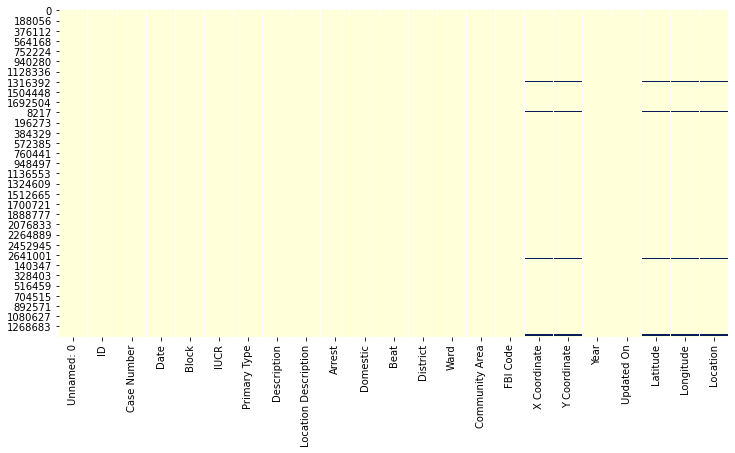

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(crime_rate.isnull(), cbar = False, cmap = 'YlGnBu')

In [12]:
crime_rate.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'District', 'Ward', 'Community Area', 'FBI Code','X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Location', 'Beat', 'Year'], axis = 1, inplace = True)


In [13]:
crime_rate.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [14]:
crime_rate['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

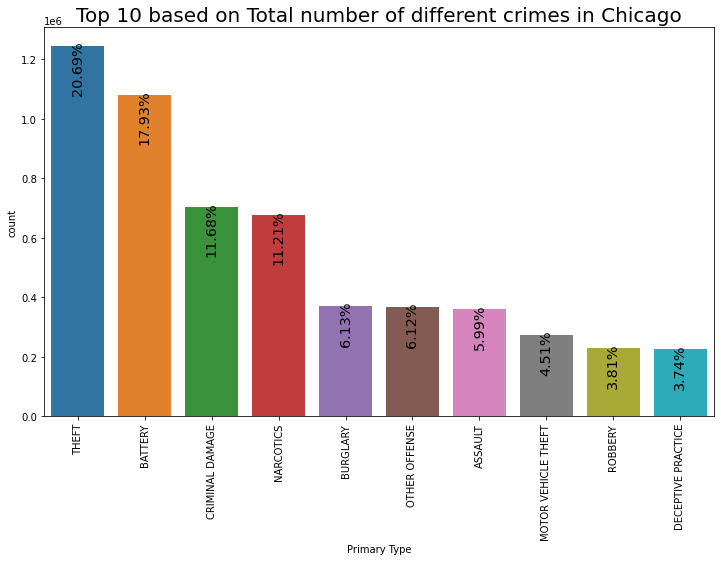

In [15]:
total = float(len(crime_rate))

plt.figure(figsize=(12,6))
cntplot = sns.countplot(crime_rate['Primary Type'], order=crime_rate['Primary Type'].value_counts().iloc[:10].index)
cntplot.set_title('Top 10 based on Total number of different crimes in Chicago', fontsize = 20)
for p in cntplot.patches:
    cntplot.text(p.get_x() + p.get_width()/2., p.get_height() + 3, '{:1.2f}%'.format(100 * p.get_height()/total), ha="center", rotation="vertical", va='center_baseline', fontsize = 'x-large')    

plt.subplots_adjust(bottom=0.1,top=1, wspace=0.3, hspace=0.4)

plt.xticks(rotation=90)
plt.show();

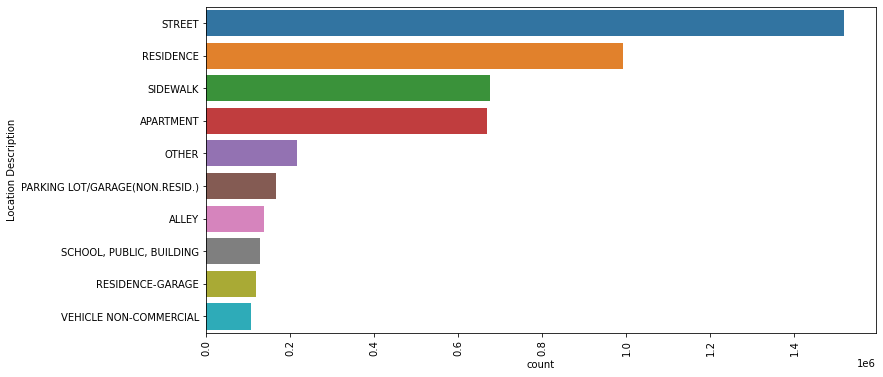

In [16]:
plt.figure(figsize = (12,6))
cntplot = sns.countplot(y = 'Location Description', data = crime_rate, order=crime_rate['Location Description'].value_counts().iloc[:10].index)

plt.xticks(rotation=90)
plt.show();


In [17]:
crime_rate['Date'] = pd.to_datetime(crime_rate['Date'], format = '%m/%d/%Y %I:%M:%S %p')

crime_rate.index = pd.DatetimeIndex(crime_rate['Date'])


In [18]:
crime_rate.resample('Y').size() 

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

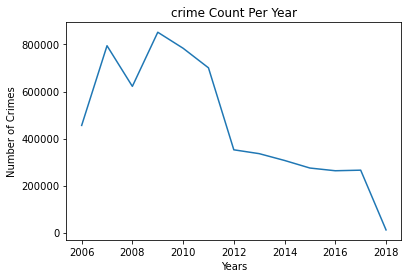

In [19]:
plt.plot(crime_rate.resample('Y').size())
plt.title('crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

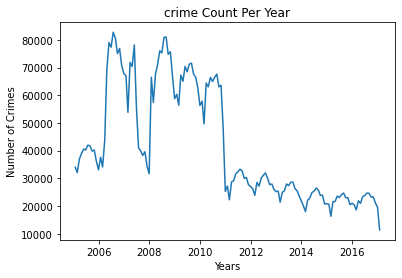

In [20]:
plt.plot(crime_rate.resample('M').size())
plt.title('crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')



In [21]:
crime_rate_resampled = crime_rate.resample('M').size().reset_index()


In [22]:
crime_rate_resampled

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [23]:
crime_rate_resampled.columns = ['ds', 'y']

In [24]:
p_model = Prophet()
p_model.fit(crime_rate_resampled)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_predict = p_model.make_future_dataframe(periods = 365)
forecast = p_model.predict(future_predict)

In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60424.697099,39417.476600,73028.764274,60424.697099,60424.697099,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,-4822.510798,0.0,0.0,0.0,55602.186301
1,2005-02-28,60293.923673,34262.121678,67688.675477,60293.923673,60293.923673,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,-9495.561623,0.0,0.0,0.0,50798.362050
2,2005-03-31,60149.138810,42660.634705,75464.807718,60149.138810,60149.138810,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,-1257.338280,0.0,0.0,0.0,58891.800529
3,2005-04-30,60009.024425,45447.801899,77724.673295,60009.024425,60009.024425,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,1121.350769,0.0,0.0,0.0,61130.375194
4,2005-05-31,59864.239561,48241.200441,82029.114017,59864.239561,59864.239561,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,5414.419192,0.0,0.0,0.0,65278.658753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9645.903360,-9642.344522,23301.346154,9478.625798,9815.797296,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,-4118.620500,0.0,0.0,0.0,5527.282859
506,2018-01-28,9632.572677,-11635.062469,22791.209901,9463.641160,9802.994223,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,-4264.230591,0.0,0.0,0.0,5368.342086
507,2018-01-29,9619.241995,-12709.077311,21920.208959,9449.090071,9790.191150,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,-4422.386319,0.0,0.0,0.0,5196.855676
508,2018-01-30,9605.911313,-11711.017108,20874.723987,9434.538982,9777.388077,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,-4592.765411,0.0,0.0,0.0,5013.145902


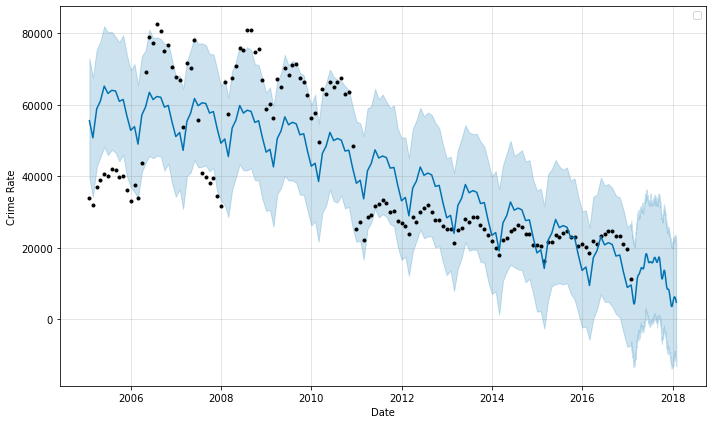

In [27]:
figure = p_model.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')
plt.legend()

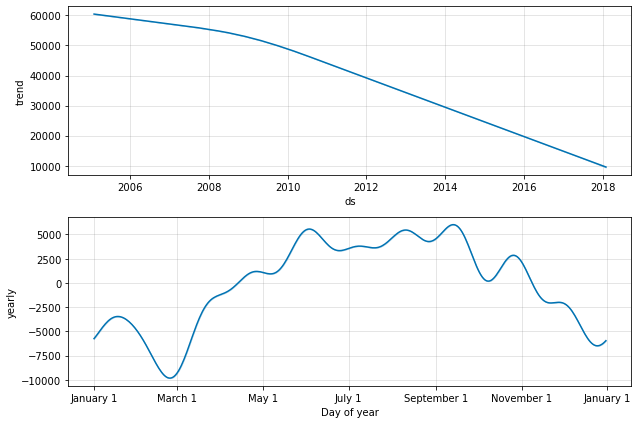

In [28]:
figure = p_model.plot_components(forecast)

# Next 365 days predictions